In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [1]:
import os

path = os.listdir('/kaggle/input/brain-tumor-classification-mri/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/kaggle/input/brain-tumor-classification-mri/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [7]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [8]:
np.unique(Y)

array([0, 1])

In [9]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [10]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

# Visualize Data

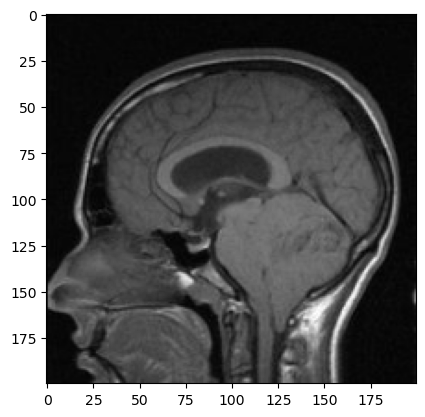

In [11]:
plt.imshow(X[0], cmap='gray')

# Prepare Data

In [12]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

# Split Data

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [14]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

Feature Scaling

In [15]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [16]:
from sklearn.decomposition import PCA
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


# Train Model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [18]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [19]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

# Evaluation

In [20]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9714285714285714


In [21]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9928352098259979
Testing Score: 0.9673469387755103


# Prediction

In [22]:
pred = sv.predict(xtest)

In [23]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  3,  57,  60, 138, 159, 207, 220, 225]),)

In [24]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  8
1 1


# Test Model

In [25]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

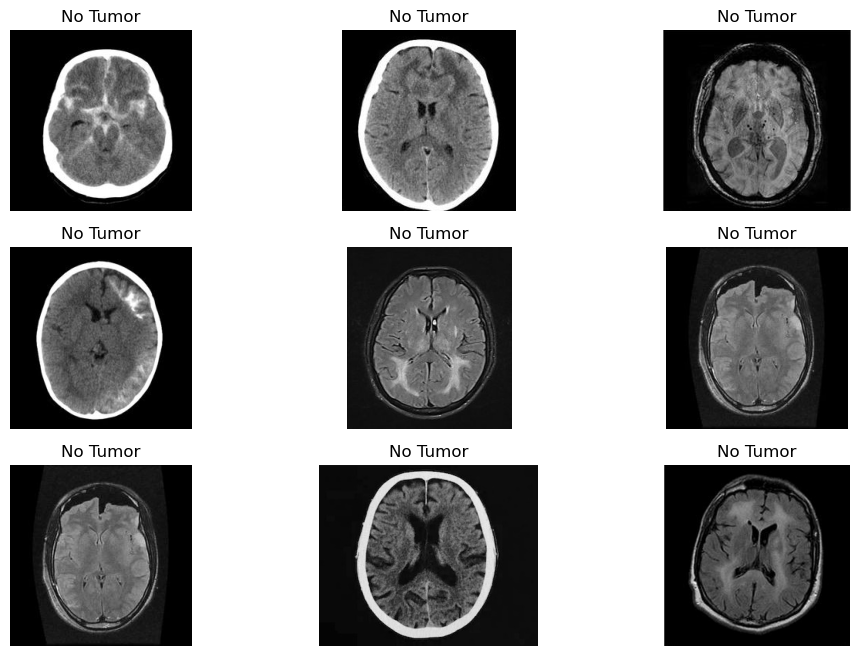

In [27]:
plt.figure(figsize=(12,8))
p = os.listdir('/kaggle/input/brain-tumor-classification-mri/Testing/')
c=1
for i in os.listdir('/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

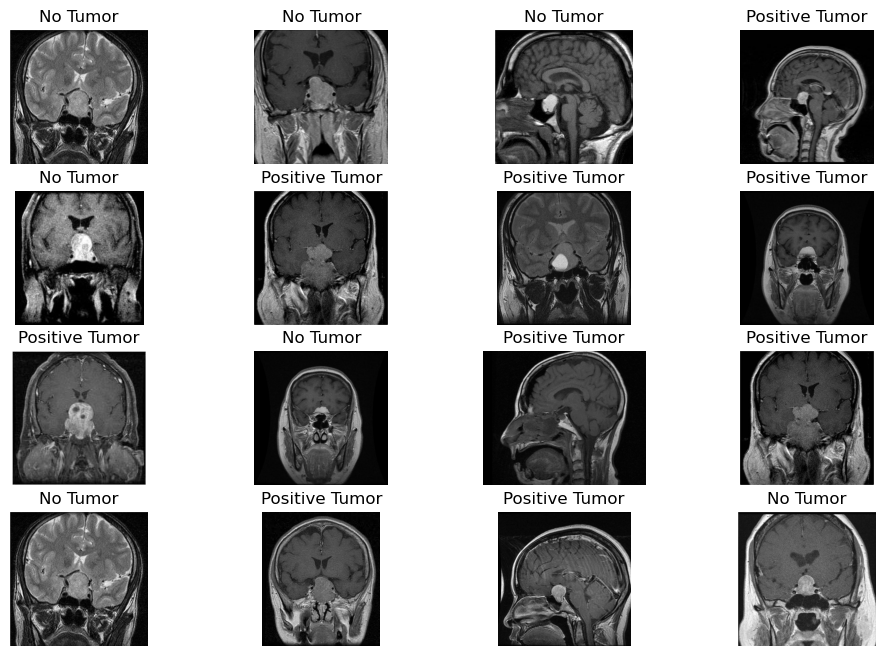

In [28]:
plt.figure(figsize=(12,8))
p = os.listdir('/kaggle/input/brain-tumor-classification-mri/Testing/')
c=1
for i in os.listdir('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1